### Importing Required Libraries

In this step, we import the essential Python libraries used for data analysis, visualization, and preprocessing:

- **NumPy (`numpy`)**: Provides support for numerical operations and arrays.
- **Pandas (`pandas`)**: Used for data manipulation and handling tabular datasets.
- **Matplotlib (`pyplot`)**: A basic plotting library for data visualization.
- **Seaborn (`seaborn`)**: An advanced visualization library built on top of Matplotlib with better styling.
- **SciPy (`stats`)**: Provides statistical functions and tests.
- **Scikit-learn (`LabelEncoder`)**: A machine learning library, here we use it for encoding categorical labels.


In [21]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### Loading the Dataset

Here we load the dataset **Multiclass Diabetes Dataset.csv** using `pandas.read_csv()`.  
This function reads the CSV file and stores it into a DataFrame called `df_clean`, which allows us to work with the dataset in a structured way (rows and columns).


In [22]:
df_clean = pd.read_csv('Multiclass Diabetes Dataset.csv')

In [23]:
df_clean

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2


In [24]:
df_clean.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')

### Dataset Information

Using `df_clean.info()`, we get a summary of the dataset including the number of rows, columns, data types, and non-null values.  
This helps us quickly understand the structure of the dataset before further analysis.


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


📑 Key observations from the dataset info:

- The dataset contains **264 rows (records)** and **12 columns (features)**.
- All columns have **264 non-null values**, meaning there are **no missing values**.
- Data types:
  - **Integer columns (4)**: `Gender`, `AGE`, `Cr`, `Class`
  - **Float columns (8)**: `Urea`, `HbA1c`, `Chol`, `TG`, `HDL`, `LDL`, `VLDL`, `BMI`
- The target column is `Class`, which represents the diabetes classification.
- Memory usage is relatively small (~25 KB).

✅ The dataset is clean and ready for further preprocessing or analysis.

________________________________________________________________________

### Descriptive Statistics of the Dataset

The function `df_clean.describe()` provides summary statistics for all numerical columns in the dataset, including:

- **Count**: Number of non-null values
- **Mean**: Average value
- **Std**: Standard deviation (spread of data)
- **Min / Max**: Minimum and maximum values
- **25%, 50%, 75%**: Percentiles (quartiles), useful for understanding the data distribution

In [26]:
df_clean.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [27]:
df_clean.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

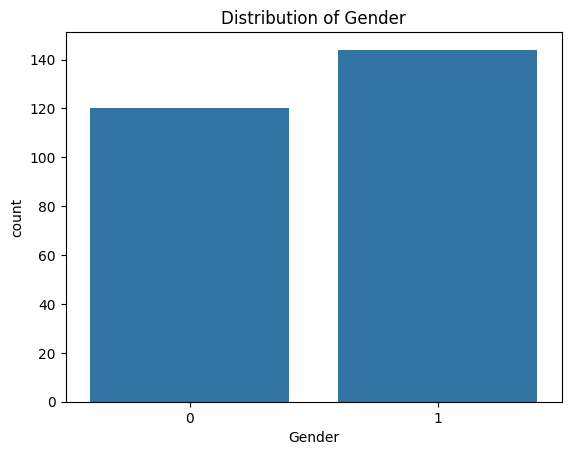

In [28]:
sns.countplot(x='Gender', data=df_clean)
plt.title("Distribution of Gender")
plt.show()

 From the plot:

- The dataset contains **144 males (encoded as 1)** and **120 females (encoded as 0)**.
- The distribution is relatively balanced, with slightly more males than females.
- This balance is important to avoid gender bias in training machine learning models.

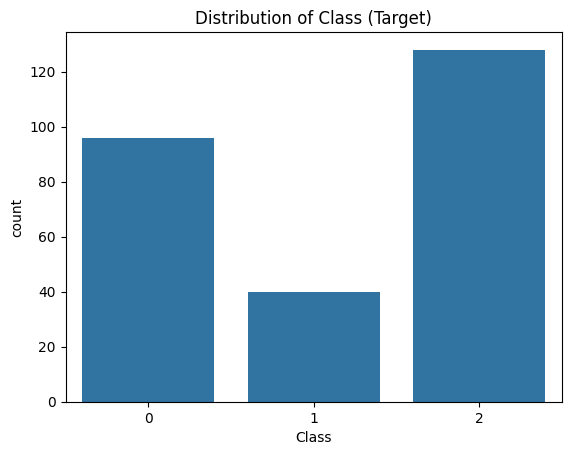

In [29]:
sns.countplot(x='Class', data=df_clean)
plt.title("Distribution of Class (Target)")
plt.show()

 From the plot:

- **Class 2** is the majority class with **128 patients**.
- **Class 0** has **96 patients**.
- **Class 1** is the minority class with only **40 patients**.

 The dataset is **imbalanced** since Class 1 has significantly fewer samples compared to the other classes.  
This imbalance must be considered when building machine learning models (e.g., using resampling techniques or class weights).
____________________________________________________________________________


### Unit Conversion and Feature Engineering

In this step, we perform unit conversions for several biochemical features to standardize the dataset:

- **Cr (Creatinine)**: Converted from µmol/L to mg/dL using the factor `/88.4`.
- **Chol (Cholesterol)**: Converted from mmol/L to mg/dL using the factor `×38.7`.
- **TG (Triglycerides)**: Converted from mmol/L to mg/dL using the factor `×88.5`.
- **HDL (High-Density Lipoprotein)**: Converted from mmol/L to mg/dL using the factor `×38.7`.
- **LDL (Low-Density Lipoprotein)**: Converted from mmol/L to mg/dL using the factor `×38.7`.

Additionally:
- **VLDL (Very Low-Density Lipoprotein)** is recalculated using the formula:  
  \[
  VLDL = {TG}{5}
  \]


In [56]:
df_clean['Cr']=df_clean['Cr']/88.4
df_clean['Chol']=df_clean['Chol']*38.7
df_clean['TG']=df_clean['TG']*88.5
df_clean['HDL']=df_clean['HDL']*38.7
df_clean['LDL']=df_clean['LDL']*38.7
df_clean["VLDL"] = df_clean["TG"] /5

 After this step:
- All biochemical features are standardized into **mg/dL**, which ensures consistency across the dataset.
- A new feature (`VLDL`) is derived based on Triglycerides.
- This preprocessing step is crucial for correct medical interpretation and reliable input to machine learning models.

__________________________________________________

### Boxplots for All Features

We plot **boxplots** for all dataset features.  
Boxplots help to detect:
- The overall distribution of each feature.
- The presence of **outliers** (points outside the whiskers).


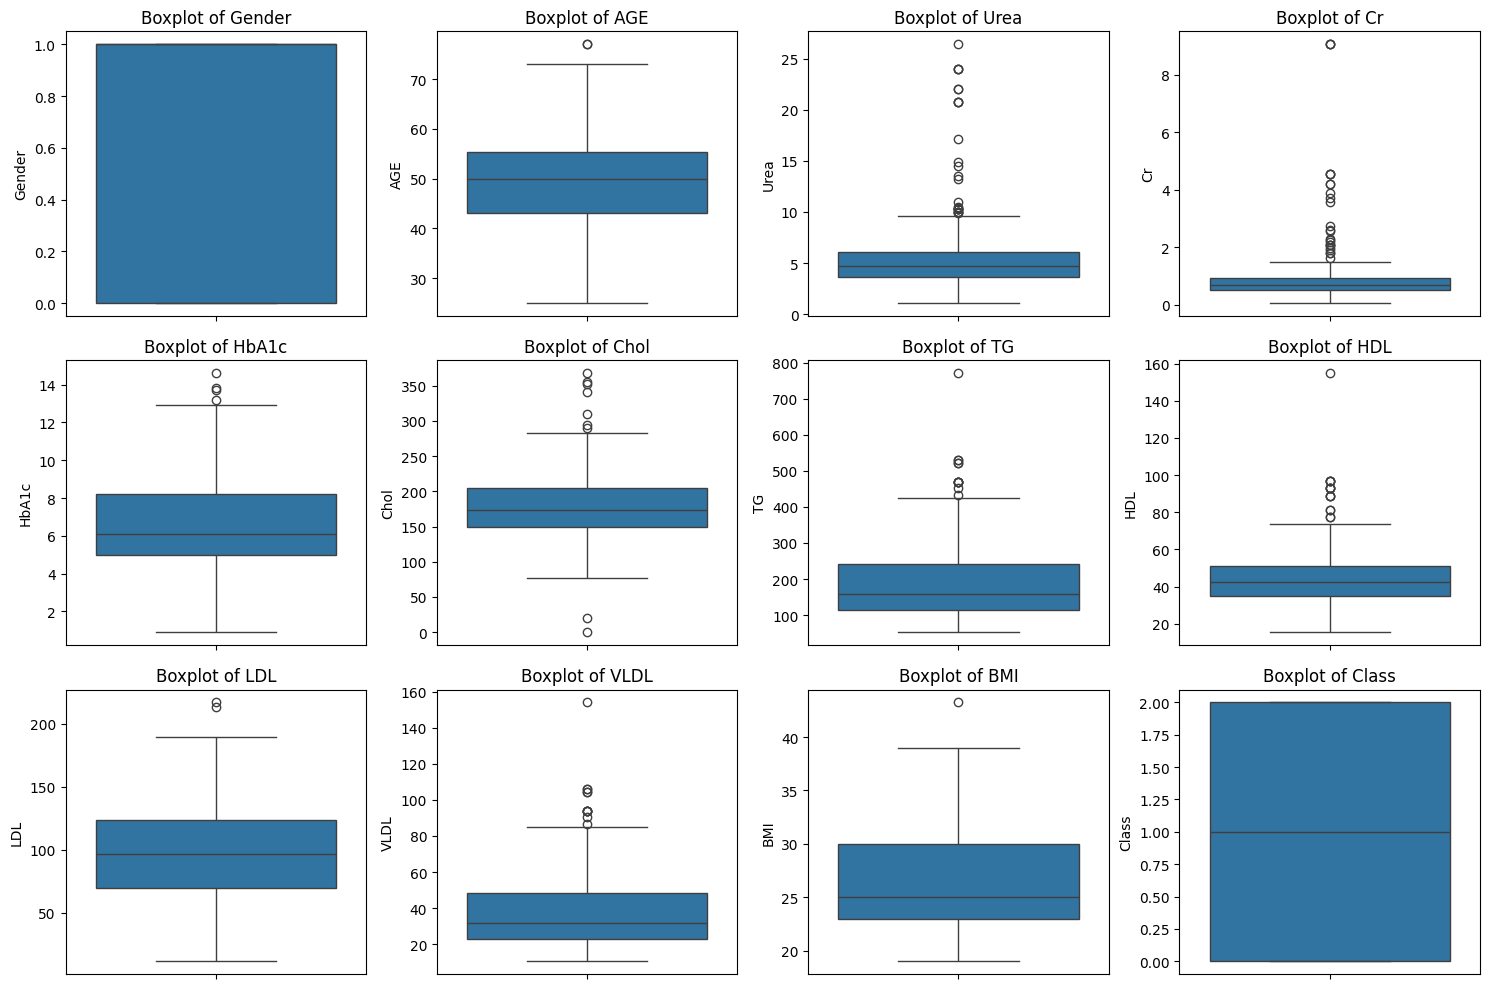

In [32]:
numdata=df_clean.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numdata):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

 Observations from the boxplots:

- **AGE**: Mostly concentrated in the middle age range, but some extreme values appear at the higher end.
- **Urea & Cr**: Show noticeable outliers, which is expected since kidney-related measures often vary significantly in medical datasets.
- **HbA1c**: Distribution shows some higher outliers, indicating patients with poor glucose control.
- **Chol, TG, LDL, VLDL**: Clear presence of outliers at the upper end, representing patients with abnormally high lipid levels.
- **HDL**: Distribution is narrower but still shows some outliers on the lower side.
- **BMI**: Displays a wide spread with high outliers, indicating overweight/obese cases.
- **Gender & Class**: Being categorical/numeric-encoded, they do not provide meaningful boxplots (but are still shown).
  
 These outliers should be carefully handled — either kept (since they may represent real medical conditions) or treated depending on the modeling approach.

________________________________________

In [33]:
"""
def remove_outliers_iqr(fdata, cols=None):
    df_clean = fdata.copy()
    
    # لو المستخدم محدد أعمدة معينة
    if cols is None:
        cols = df_clean.select_dtypes(include='number').columns
    
    for col in cols:
        if col in df_clean.columns:  # نتأكد إن العمود موجود
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


# تحديد الأعمدة المطلوبة
cols_to_clean = ["Cr", "Chol", "TG", "HDL","VLDL"]

df_clean = remove_outliers_iqr(fdata, cols=cols_to_clean)

# رسم Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_clean):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
"""


'\ndef remove_outliers_iqr(fdata, cols=None):\n    df_clean = fdata.copy()\n    \n    # لو المستخدم محدد أعمدة معينة\n    if cols is None:\n        cols = df_clean.select_dtypes(include=\'number\').columns\n    \n    for col in cols:\n        if col in df_clean.columns:  # نتأكد إن العمود موجود\n            Q1 = df_clean[col].quantile(0.25)\n            Q3 = df_clean[col].quantile(0.75)\n            IQR = Q3 - Q1\n            lower_bound = Q1 - 1.5 * IQR\n            upper_bound = Q3 + 1.5 * IQR\n            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]\n    \n    return df_clean\n\n\n# تحديد الأعمدة المطلوبة\ncols_to_clean = ["Cr", "Chol", "TG", "HDL","VLDL"]\n\ndf_clean = remove_outliers_iqr(fdata, cols=cols_to_clean)\n\n# رسم Boxplots\nplt.figure(figsize=(15, 10))\nfor i, col in enumerate(cols_to_clean):\n    plt.subplot(3, 2, i+1)\n    sns.boxplot(y=df_clean[col])\n    plt.title(f"Boxplot of {col}")\nplt.tight_layout()\nplt.show()\n'

### Histograms of Numerical Features

We plot histograms for all numerical features using `df_clean.hist()`.  
Histograms show how the data values are distributed (e.g., normal distribution, skewness, peaks, spread).  
This is useful for detecting:
- Skewed data
- Multimodal distributions
- Concentration of values


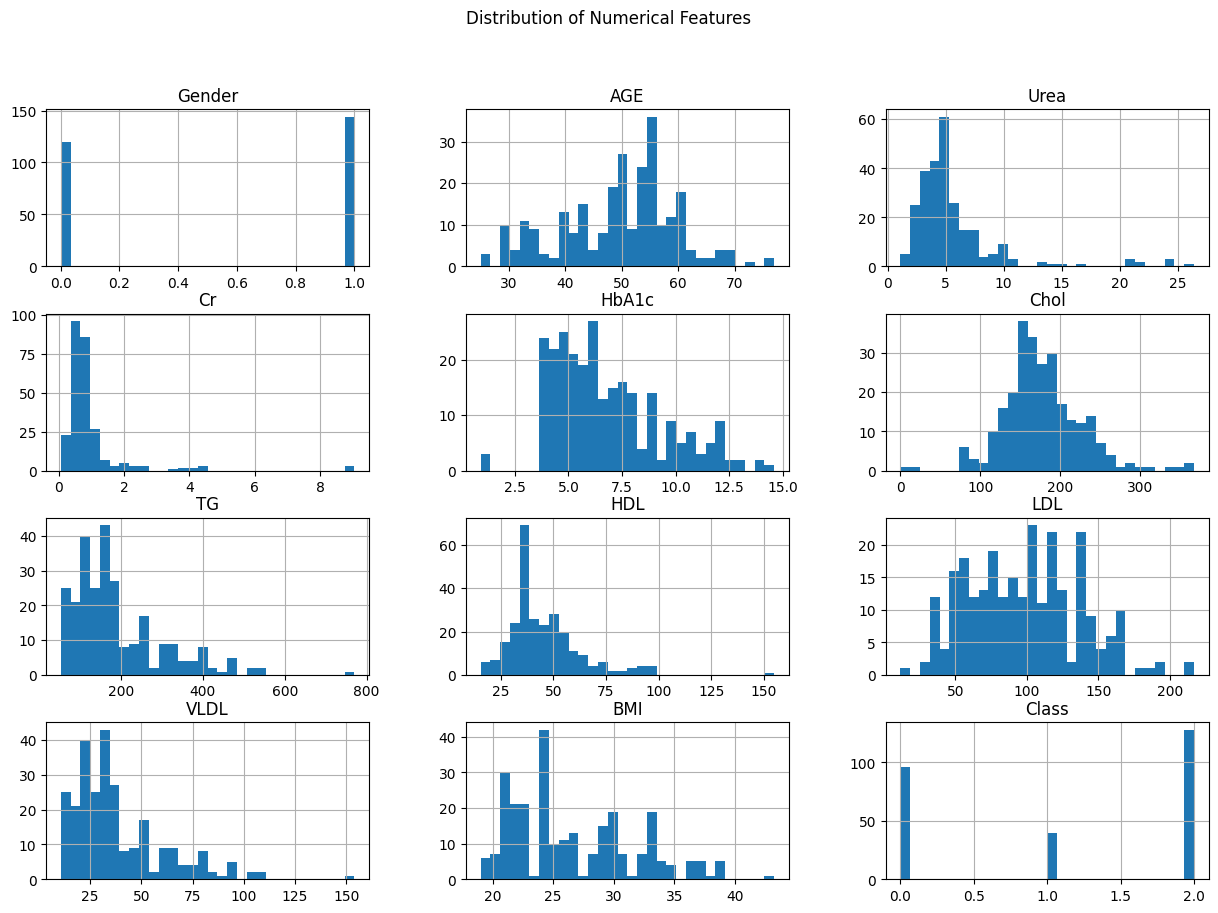

In [34]:
numdata=df_clean.columns
df_clean[numdata].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

### Observations from the histograms:

- **AGE**: Values are mostly concentrated in middle adulthood, with fewer younger and older patients.
- **Urea & Cr**: Right-skewed distributions with some very high values (consistent with the outliers seen earlier).
- **HbA1c**: Distribution is slightly skewed to the right, with some patients showing high blood sugar levels.
- **Chol, TG, LDL, VLDL**: All show right-skewed distributions, with a concentration around normal ranges but clear presence of patients with high levels.
- **HDL**: Distribution peaks around the normal/healthy range but has a tail toward lower values.
- **BMI**: Shows a wide spread with concentration around overweight values, extending into obese ranges.
- **Gender & Class**: Being categorical, their histograms just show frequency counts (not continuous distributions).
  
_____________________________________________________


In [35]:
df_clean.loc[(df_clean['Class'] == 2) & (df_clean['HbA1c'] < 6.6) & (df_clean['HbA1c'] > 5.7), 'Class'] = 1

## Boxplots of Numerical Features by Class

The following plots show the distribution of each numerical feature across different classes.  
Boxplots help us detect differences between classes and spot potential outliers.


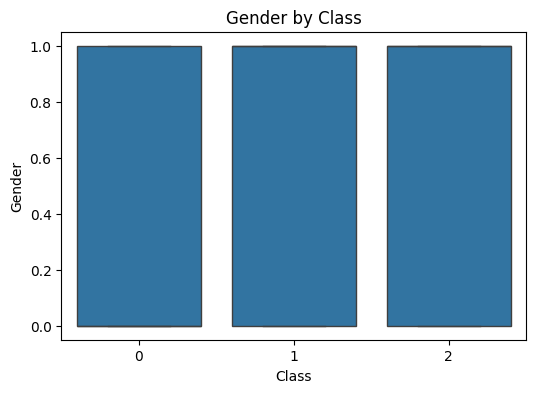

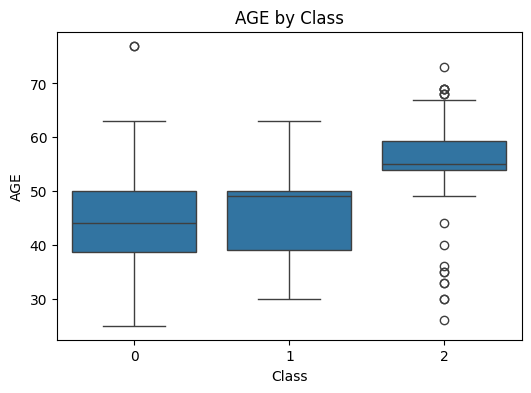

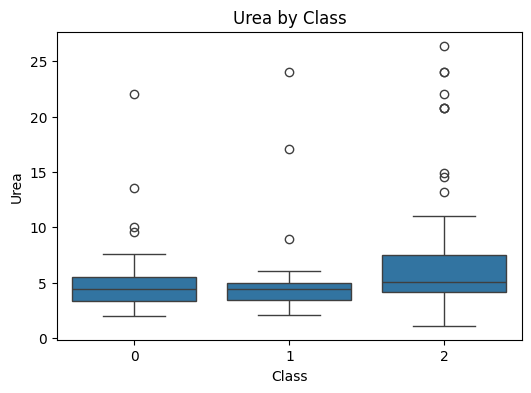

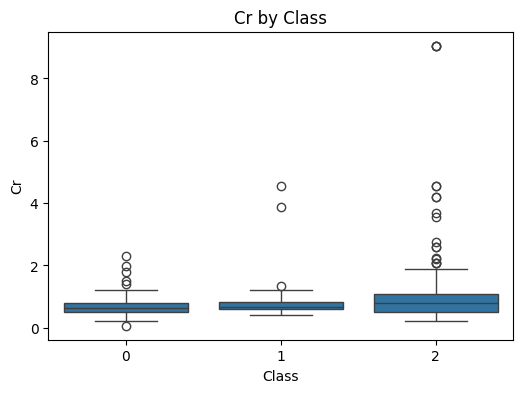

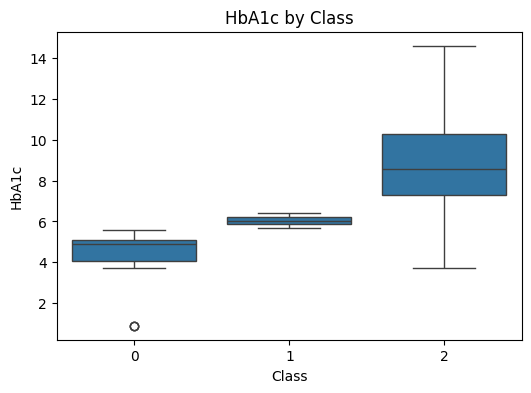

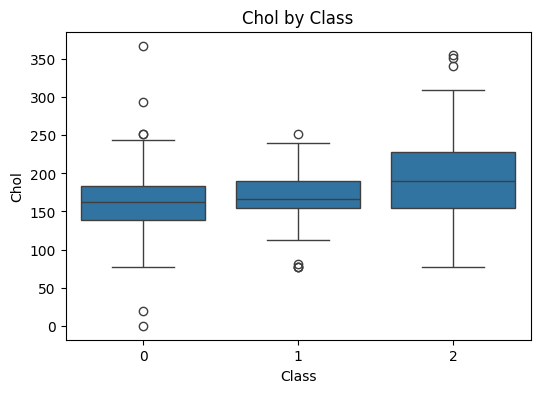

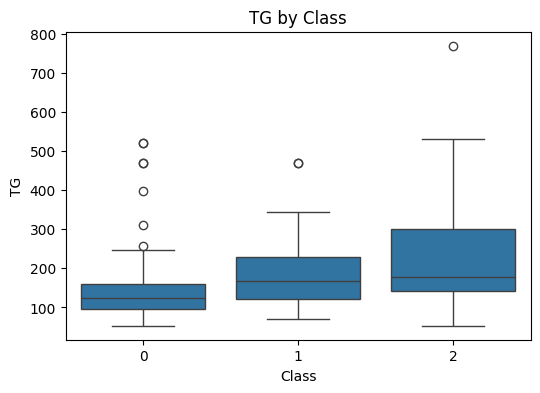

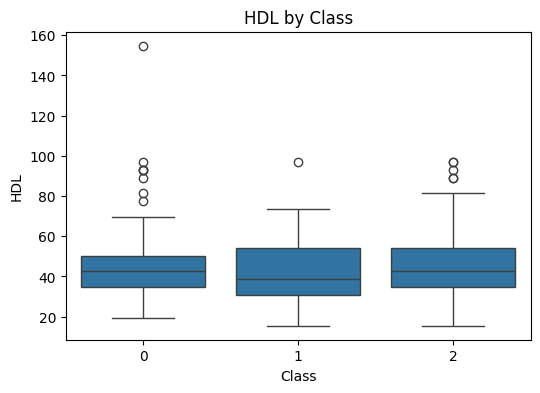

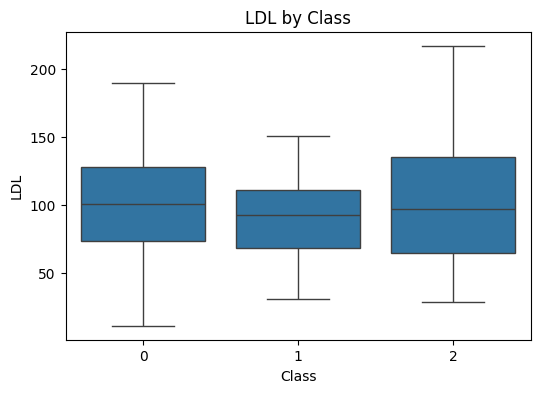

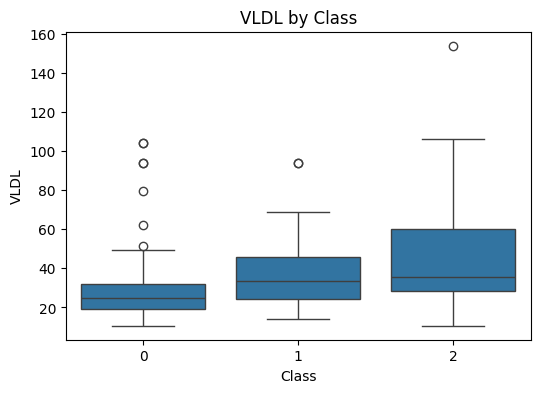

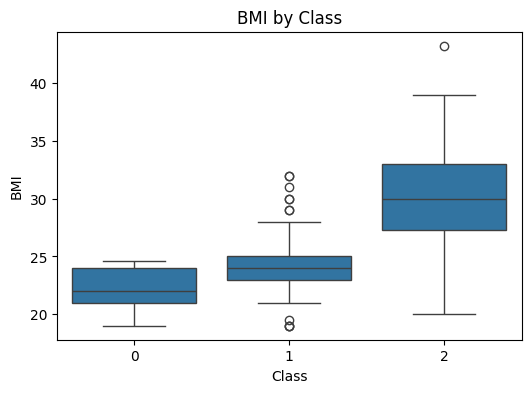

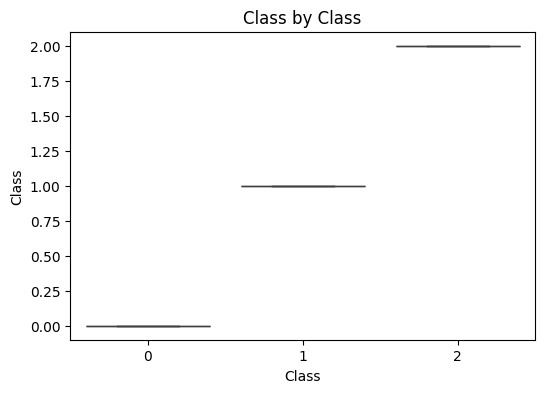

In [37]:
for col in numdata:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df_clean)
    plt.title(f"{col} by Class")
    plt.show()

### Feature Importance Analysis  

The **class value** is mainly influenced by the following features:  
- **Age**  
- **HbA1c level**  
- **BMI**  

Other columns also have an impact, but these three features contribute the most to the prediction.  


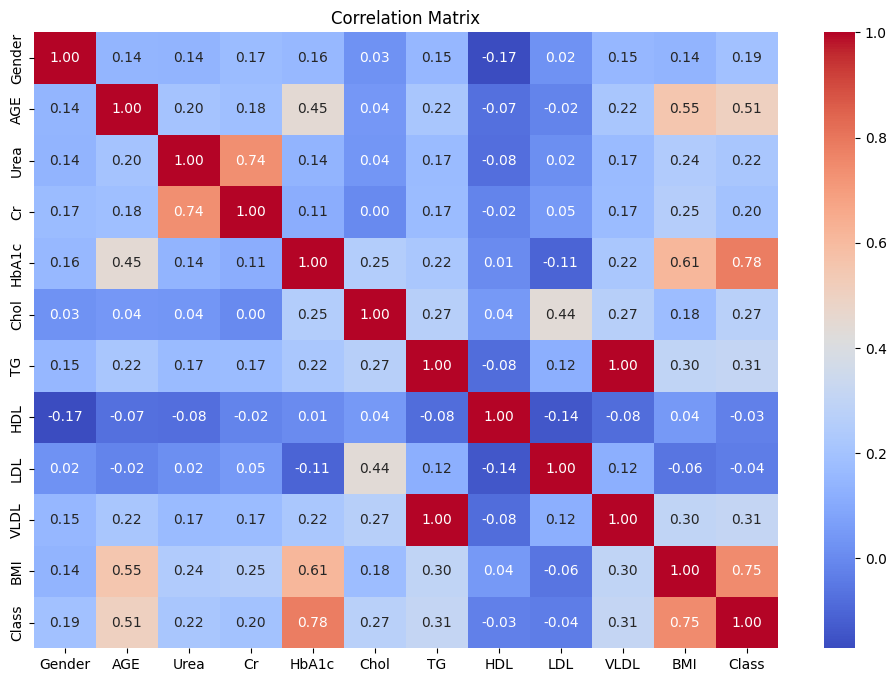

In [38]:
plt.figure(figsize=(12, 8))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Feature Correlation Analysis  

The **class value** shows the strongest correlation with the following features:  
- **Age**  
- **HbA1c level**  
- **BMI**  

Other columns also exhibit correlations with the class value, but these three features have the highest correlation and thus contribute the most to the prediction.

_________________________________________________

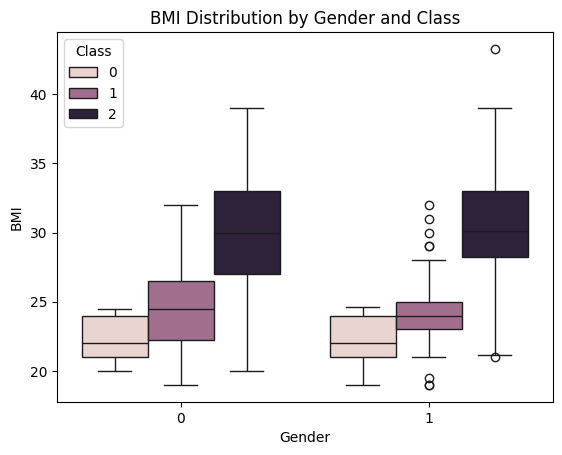

In [39]:
sns.boxplot(x='Gender', y='BMI', hue='Class', data=df_clean)
plt.title("BMI Distribution by Gender and Class")
plt.show()

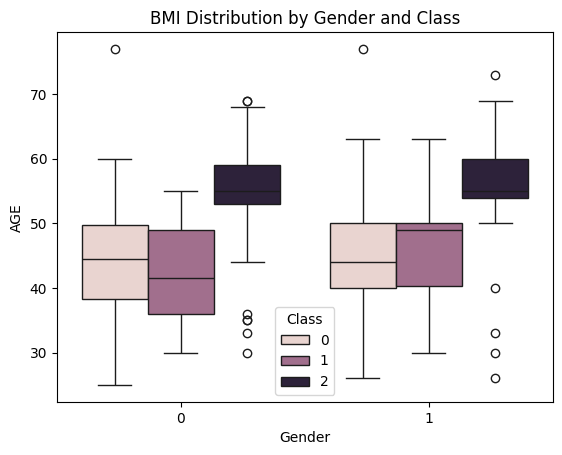

In [55]:
sns.boxplot(x='Gender', y='AGE', hue='Class', data=df_clean)
plt.title("BMI Distribution by Gender and Class")
plt.show()

In [41]:
X=df_clean.drop('Class',axis=1)
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,0.520362,4.9,162.54,79.65,92.88,54.18,15.93,24.0
1,1,26,4.5,0.701357,4.9,143.19,123.90,42.57,81.27,24.78,23.0
2,1,33,7.1,0.520362,4.9,189.63,88.50,30.96,77.40,17.70,21.0
3,0,45,2.3,0.271493,4.0,112.23,88.50,38.70,58.05,17.70,21.0
4,0,50,2.0,0.565611,4.0,139.32,115.05,34.83,81.27,23.01,24.0
...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,4.536199,7.0,166.41,256.65,15.48,104.49,51.33,30.0
260,0,61,24.0,4.536199,7.0,166.41,256.65,15.48,104.49,51.33,36.6
261,1,60,20.8,9.049774,9.0,89.01,97.35,34.83,34.83,19.47,33.0
262,1,56,20.8,9.049774,9.0,178.02,177.00,46.44,96.75,35.40,35.0


In [42]:
y=df_clean['Class']
y

0      0
1      0
2      0
3      0
4      0
      ..
259    2
260    2
261    2
262    2
263    2
Name: Class, Length: 264, dtype: int64

### Libraries and Modules Overview

- **pandas (`import pandas as pd`)**: Used for data manipulation and analysis, especially tabular data like CSV or Excel files.  
- **numpy (`import numpy as np`)**: Fundamental for numerical computations and operations on arrays.  
- **matplotlib & seaborn (`import matplotlib.pyplot as plt`, `import seaborn as sns`)**: For creating plots and visualizations to better understand data.  

### Scikit-Learn Imports

- **Data Splitting (`train_test_split`)**: Splits data into training and testing sets.  
- **Ensemble Models (`RandomForestClassifier`, `GradientBoostingClassifier`, `VotingClassifier`)**: Advanced models that combine multiple smaller models to improve prediction accuracy.  
- **Preprocessing (`StandardScaler`)**: Standardizes features by removing the mean and scaling to unit variance.  
- **Evaluation Metrics (`accuracy_score`, `confusion_matrix`, `f1_score`, `precision_score`, `recall_score`)**: Used to evaluate model performance.  
- **Classical Classifiers (`LogisticRegression`, `DecisionTreeClassifier`, `GaussianNB`, `KNeighborsClassifier`, `XGBClassifier`)**: Various popular machine learning classifiers for different tasks.  

### Object Initialization

- **`scaler = StandardScaler()`**: Creates an instance of `StandardScaler` for feature standardization.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn .ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
scaler=StandardScaler()
x=scaler.fit_transform(X)
x

array([[-1.09544512,  0.04721685, -0.24316765, ..., -1.13282337,
        -0.99086027, -0.51669126],
       [ 0.91287093, -2.32711614, -0.29322711, ..., -0.431615  ,
        -0.59511578, -0.71338694],
       [ 0.91287093, -1.63460235,  0.35754594, ..., -0.53178762,
        -0.91171137, -1.10677832],
       ...,
       [ 0.91287093,  1.03652226,  3.78661933, ..., -1.63368649,
        -0.83256248,  1.25356992],
       [ 0.91287093,  0.6408001 ,  3.78661933, ..., -0.0309245 ,
        -0.12022238,  1.6469613 ],
       [ 0.91287093,  0.83866118,  3.78661933, ...,  1.77218273,
         0.59211771,  1.25356992]])

### Standardized Data (`x`)

- The variable **`x`** is a standardized version of your original data **`X`**.  
- Values in `x` are typically small decimals, both positive and negative, centered around zero.  
- This standardized data **`x`** should be used for training machine learning models instead of the original `X` to achieve better performance.

_____________________________________________

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


### Machine Learning Models Overview
 

#### Models:

- **Logistic Regression (`LogisticRegression`)**  
  - Simple and effective model for binary and multiclass classification.  
  - `max_iter=1000`: Increases iterations for convergence.  
  - `random_state=42`: Ensures reproducible results.  

- **Decision Tree Classifier (`DecisionTreeClassifier`)**  
  - Mimics human decision-making by building a tree-like structure.  
  - `random_state=42`: Ensures reproducibility.  

- **Random Forest Classifier (`RandomForestClassifier`)**  
  - Advanced model composed of many decision trees; uses majority voting.  
  - Reduces overfitting.  
  - `n_estimators=200`: Builds 200 trees.  

- **Support Vector Machine (`SVC`)**  
  - Finds the optimal boundary between classes.  
  - `probability=True`: Enables probability estimates for predictions.  

- **Gaussian Naive Bayes (`GaussianNB`)**  
  - Fast probabilistic model based on Bayes' theorem.  
  - Assumes feature independence ("naive").  

- **K-Nearest Neighbors (`KNeighborsClassifier`)**  
  - Classifies a new point based on the most common class among its nearest neighbors.  
  - `n_neighbors=2`: Considers 2 nearest neighbors.  

- **XGBoost (`XGBClassifier`)**  
  - Powerful gradient boosting model, widely used in competitions.  
  - `use_label_encoder=False` & `eval_metric='mlogloss'`: Settings to improve performance and avoid warnings.  


In [45]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=200,random_state=42),
    'Support Vector Machine': SVC(probability=True,random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
    'XGBClassiier':XGBClassifier()
}
if XGBClassifier is not None:
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from IPython.display import display, Markdown
results = []
for name, model in models.items():
    print(f"Training: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = None
    try:
        y_proba = model.predict_proba(x_test)
    except Exception:
        pass
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({'model': name, 'model_obj': model, 'accuracy': acc, 'report': report, 'y_pred': y_pred, 'y_proba': y_proba})


res_df = pd.DataFrame([{'Model': r['model'], 'Accuracy': r['accuracy']} for r in results]).sort_values('Accuracy', ascending=False)
display(res_df)

Training: Logistic Regression
Training: Decision Tree Classifier
Training: Random Forest Classifier
Training: Support Vector Machine
Training: Gaussian Naive Bayes
Training: K-Nearest Neighbors
Training: XGBClassiier
Training: XGBoost


c:\Users\ASUS\anaconda3\envs\test\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy
1,Decision Tree Classifier,0.981132
2,Random Forest Classifier,0.981132
6,XGBClassiier,0.981132
7,XGBoost,0.981132
4,Gaussian Naive Bayes,0.886792
3,Support Vector Machine,0.886792
0,Logistic Regression,0.867925
5,K-Nearest Neighbors,0.773585


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8252\4157581227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=res_df, palette='viridis')


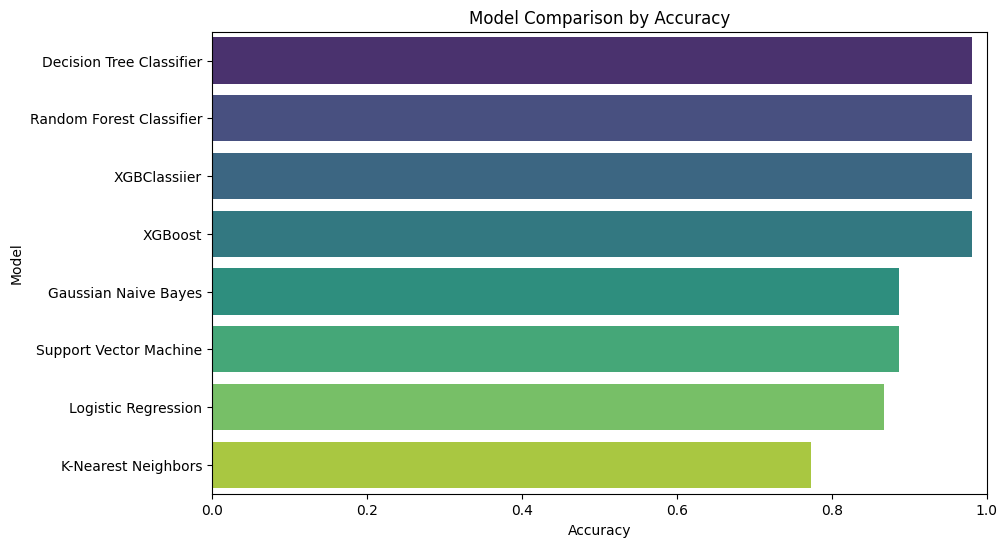

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=res_df, palette='viridis')
plt.title('Model Comparison by Accuracy')
plt.xlim(0,1)
plt.show()


Decision Tree Classifier
Accuracy: 0.9811320754716981
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         9
           2       1.00      0.96      0.98        25

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



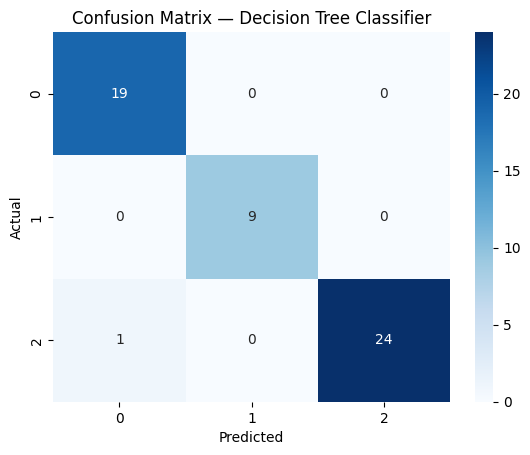


Random Forest Classifier
Accuracy: 0.9811320754716981
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         9
           2       1.00      0.96      0.98        25

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



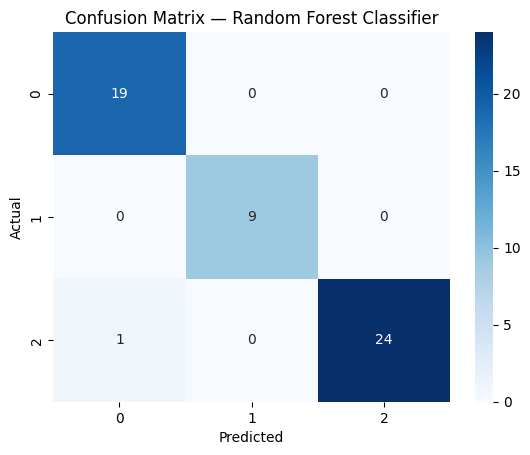


XGBClassiier
Accuracy: 0.9811320754716981
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         9
           2       1.00      0.96      0.98        25

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



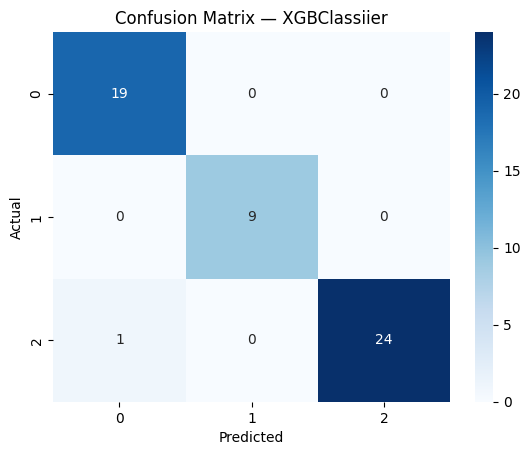

In [48]:
top_models = res_df['Model'].tolist()[:3]
for mname in top_models:
    entry = next(r for r in results if r['model']==mname)
    print('\n' + '='*40)
    print(mname)
    print('Accuracy:', entry['accuracy'])
    print('Classification Report:')
    print(classification_report(y_test, entry['y_pred']))
    cm = confusion_matrix(y_test, entry['y_pred'])
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix — {mname}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

_______________________________________________
### AUC (Area Under the Curve)

- **What is AUC?**  
  AUC is a metric that measures how well a model can distinguish between different classes.  
  - Values close to **1.0** indicate excellent discrimination.  
  - Values around **0.5** indicate performance similar to random guessing.  

- **Why calculate AUC for each class?**  
  Since your data has 3 classes:  
  - **Class 0**: Non-diabetic  
  - **Class 1**: Prediabetic  
  - **Class 2**: Diabetic  

  The code calculates the model's ability to:  
  - Distinguish "non-diabetic" from the rest  
  - Distinguish "prediabetic" from the rest  
  - Distinguish "diabetic" from the rest


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
best_entry = results[2]
if best_entry['y_proba'] is not None:
    try:
        from sklearn.preprocessing import label_binarize
        classes = sorted(y.unique())
        y_test_b = label_binarize(y_test, classes=classes)
        y_proba = best_entry['y_proba']
        # compute ROC AUC per class
        for i, cls in enumerate(classes):
            try:
                auc = roc_auc_score(y_test_b[:,i], y_proba[:,i])
                print(f'Class {cls} AUC: {auc:.3f}')
            except Exception:
                pass
    except Exception:
        pass

# Step 43: Cross-validation scores for top model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_entry['model_obj'], x, y, cv=cv, scoring='accuracy')
print('CV scores:', cv_scores)
print('CV mean accuracy:', cv_scores.mean())

Class 0 AUC: 0.997
Class 1 AUC: 1.000
Class 2 AUC: 0.989
CV scores: [0.94339623 1.         1.         0.98113208 0.98076923]
CV mean accuracy: 0.9810595065312047


### Interpretation of AUC Results

- All AUC values are very close to **1.0**, which is an excellent indicator!  
- This means the **Random Forest model** has an almost perfect ability to correctly distinguish between:  
  - Healthy individuals  
  - Prediabetic individuals  
  - Diabetic individuals  

based on the provided medical data.

_____________________________________


In [50]:
models["Random Forest Classifier"]

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Saving the Model

- The code selects the **best model** from the results (`results[2]['model_obj']`).  
- It then saves this model **along with the scaler** into a file named `diabetespridict.sav` using **pickle**.  
- This allows you to **reuse the trained model later** without retraining.


In [52]:
import pickle
best_model_name =  results[2]['model_obj']
with open("diabetespridict.sav", "wb") as f:
    pickle.dump({"model": best_model_name, "scaler": scaler}, f)


### Loading the Saved Model

- The code opens the previously saved file `diabetespridict.sav`.  
- It **loads the model and scaler** using `pickle`.  
- `mod["model"]` contains the trained machine learning model.  
- `print(type(mod["model"]))` confirms the **type of the loaded model object**.


In [53]:
with open(r"C:\Users\ASUS\Pictures\final\diabetespridict.sav", "rb") as f:
    mod = pickle.load(f)

print(type(mod["model"]))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [54]:
results[2]['model_obj']

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
